# 2018 ABF SPAN tuned

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import seaborn as sns
from IPython.display import display
from tqdm.auto import tqdm

sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import numpy as np
import os
import tempfile

In [41]:
PATH = os.path.expanduser('~/data/2018_chipseq_y20o20')
ts = []
for m in ['k27ac', 'k4me1', 'k4me3', 'k27me3', 'k36me3']:
    t = pd.read_csv(f'{PATH}/{m}.tsv', sep='\t') 
    t['Modification'] = m
    t['Tool'] = ''
    t.loc[t['Title'].str.contains('MACS'), 'Tool'] = 'MACS2 q1e-4'
    t.loc[t['Title'].str.contains('SICER'), 'Tool'] = 'SICER 1e-6'
    t.loc[t['Title'].str.contains('SPAN '), 'Tool'] = 'SPAN 0.1 200'
    t.loc[t['Title'].str.contains('_tuned.peak'), 'Tool'] = 'SPAN 1.3 100'
    ts.append(t)
    
for m in ['k27ac', 'k4me1', 'k4me3', 'k27me3', 'k36me3']:
    t = pd.read_csv(f'{PATH}/{m}_200.tsv', sep='\t')
    t['Modification'] = m
    t['Tool'] = 'SPAN 1.3 200'
    ts.append(t)
    
t = pd.concat(ts).reset_index(drop=True)
t.sample(10)

,#,Title,Bed format,Count,Total length,Genome coverage,Min length,Max length,Mean length,Median length,Source,File size,Modification,Tool
391,58,SICER OD_OD18_H3K27me3-W200-G600-FDR1.0E-6-island,"(bed4+, '\t')",16976,87825424,0.027995,199,149399,5173,3799,https://artyomovlab.wustl.edu/publications/sup...,"303,4 kb",k27me3,SICER 1e-6
683,34,YD15_k27ac_hg19_200_tuned.peak,"(bed6+, '\t')",22753,37883210,0.012076,117,22917,1664,1356,/Users/Oleg.Shpynov/data/2018_chipseq_y20o20/s...,"2,1 mb",k27ac,SPAN 1.3 200
93,94,OD14_k27ac_hg19_tuned.peak,"(bed6+, '\t')",21474,30514515,0.009727,52,20778,1420,1093,/Users/Oleg.Shpynov/data/2018_chipseq_y20o20/s...,2 mb,k27ac,SPAN 1.3 100
759,10,OD10_k27me3_hg19_200_tuned.peak,"(bed6+, '\t')",6357,45805616,0.014601,447,179111,7205,4653,/Users/Oleg.Shpynov/data/2018_chipseq_y20o20/s...,"590,3 kb",k27me3,SPAN 1.3 200
596,103,SPAN YD_YD5_H3K36me3_200_1.0E-4_40_peaks,"(bed6+, '\t')",15096,343629400,0.109535,200,475400,22762,10200,https://artyomovlab.wustl.edu/publications/sup...,"726,8 kb",k36me3,SPAN 0.1 200
551,58,SICER OD_OD19_H3K36me3-W200-G600-FDR1.0E-6-island,"(bed4+, '\t')",34709,334466891,0.106615,199,184399,9636,4999,https://artyomovlab.wustl.edu/publications/sup...,"541,4 kb",k36me3,SICER 1e-6
568,75,SICER YD_YD18_H3K36me3-W200-G600-FDR1.0E-6-island,"(bed4+, '\t')",34274,317212926,0.101115,199,173399,9255,4999,https://artyomovlab.wustl.edu/publications/sup...,"536,4 kb",k36me3,SICER 1e-6
158,41,SPAN OD_OD12_H3K4me1_200_1.0E-6_10_peaks,"(bed6+, '\t')",63502,173566800,0.055326,200,168000,2733,1200,https://artyomovlab.wustl.edu/publications/sup...,3 mb,k4me1,SPAN 0.1 200
614,121,OD4_k36me3_hg19_tuned.peak,"(bed6+, '\t')",23099,273658752,0.087231,75,186696,11847,6167,/Users/Oleg.Shpynov/data/2018_chipseq_y20o20/s...,"2,1 mb",k36me3,SPAN 1.3 100
211,94,YD18_k4me1_hg19_tuned.peak,"(bed6+, '\t')",68684,126509833,0.040326,50,41990,1841,1141,/Users/Oleg.Shpynov/data/2018_chipseq_y20o20/s...,"6,4 mb",k4me1,SPAN 1.3 100


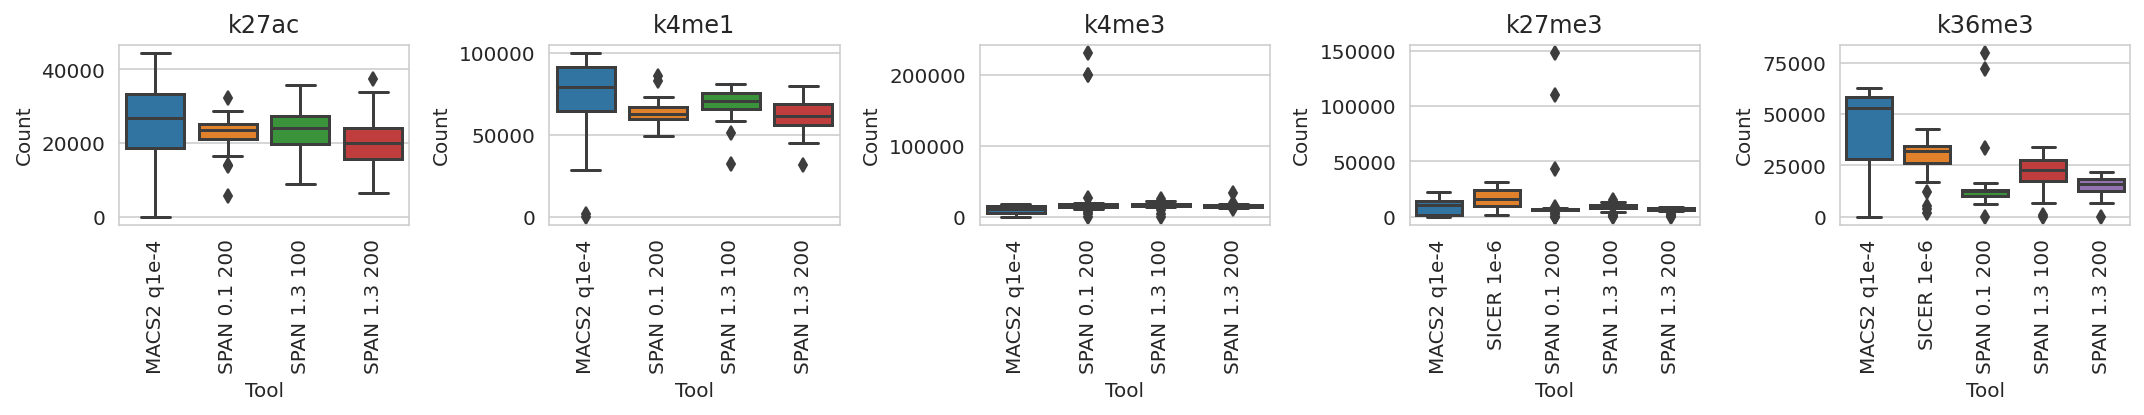

In [42]:
plt.figure(figsize=(15, 3))
axs = [plt.subplot(1, 5, i + 1) for i in range(5)]
modifications = list(t['Modification'].unique())
for i, m in enumerate(modifications):
    ax = axs[i]
    g_results = sns.boxplot(data=t[t['Modification'] == m], x='Tool', y='Count', ax=ax)
    ax.xaxis.set_tick_params(rotation=90)
    ax.title.set_text(m)
plt.tight_layout()
plt.show()

In [43]:
# Drop outliers
OUTLIERS = {'k27ac': ['YD1', 'YD6'],
           'k27me3': ['OD9', 'YD1', 'YD2', 'YD3', 'YD4', 'YD9', 'YD10', 'YD11'],
           'k36me3': ['OD3', 'OD6', 'OD20', 'YD1', 'YD3', 'YD4', 'YD5'],
           'k4me3': ['OD6', 'OD7', 'OD14', 'YD2', 'YD3', 'YD10', 'YD14']}
t_outliers = [any(m for m in OUTLIERS if any(o for o in OUTLIERS[m] if 
                                             f'{o}_h3{m}'.lower() in f.lower() or f'{o}_{m}'.lower() in f.lower())) for f in t['Title']]
print('Total outliers', sum(t_outliers))
t = t[[not to for to in t_outliers]]

Total outliers 109


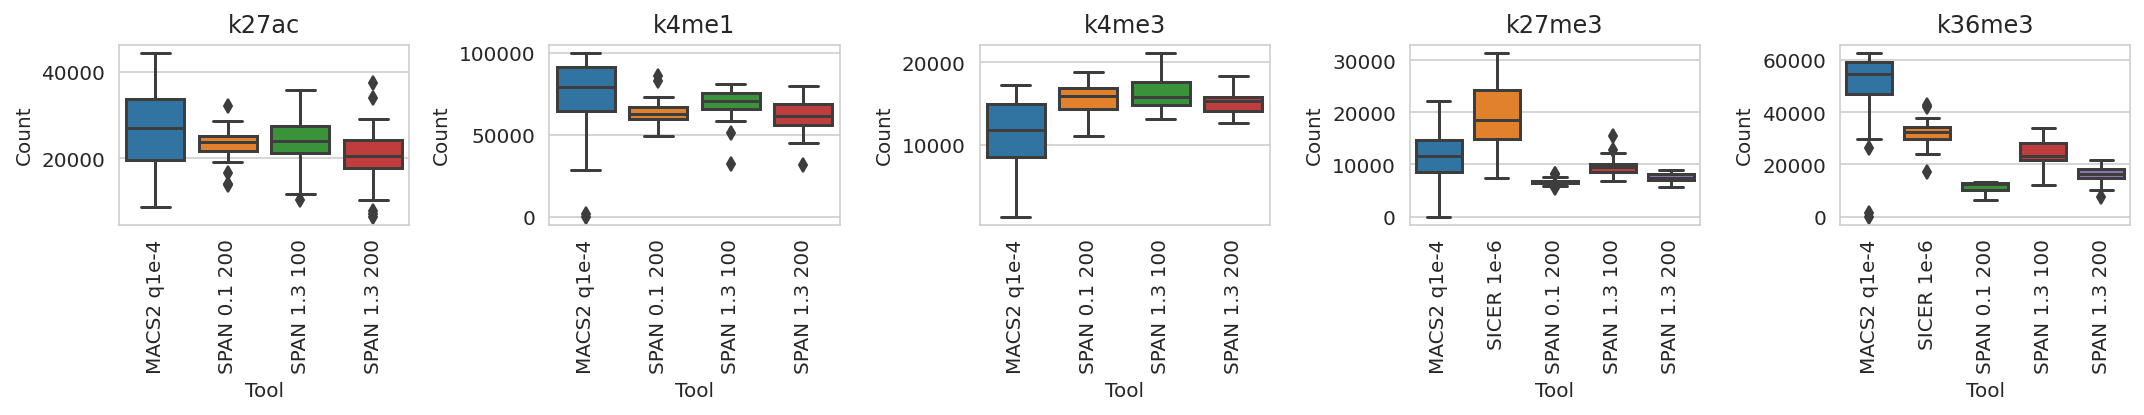

In [44]:
plt.figure(figsize=(15, 3))
axs = [plt.subplot(1, 5, i + 1) for i in range(5)]
modifications = list(t['Modification'].unique())
for i, m in enumerate(modifications):
    ax = axs[i]
    g_results = sns.boxplot(data=t[t['Modification'] == m], x='Tool', y='Count', ax=ax)
    ax.xaxis.set_tick_params(rotation=90)
    ax.title.set_text(m)
plt.tight_layout()
plt.show()

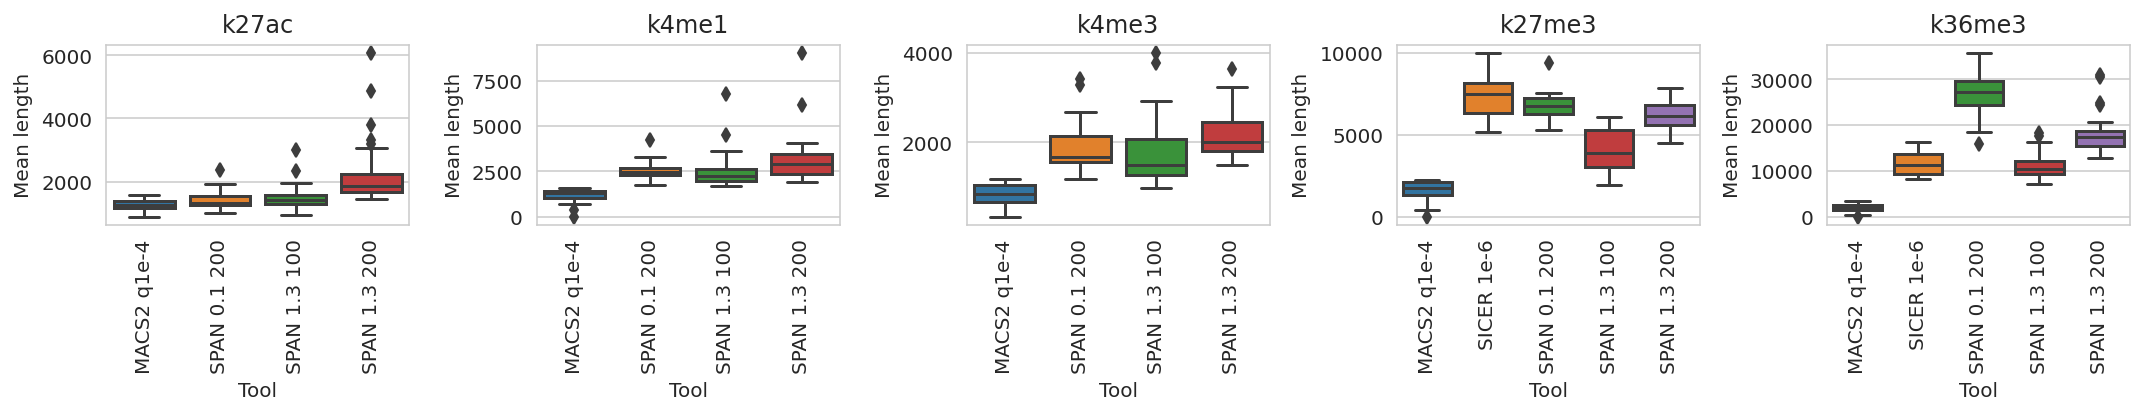

In [45]:
plt.figure(figsize=(15, 3))
axs = [plt.subplot(1, 5, i + 1) for i in range(5)]
modifications = list(t['Modification'].unique())
for i, m in enumerate(modifications):
    ax = axs[i]
    g_results = sns.boxplot(data=t[t['Modification'] == m], x='Tool', y='Mean length', ax=ax)
    ax.xaxis.set_tick_params(rotation=90)
    ax.title.set_text(m)
plt.tight_layout()
plt.show()